In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
from wordcloud import WordCloud

In [2]:
resenha = pd.read_csv("imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
resenha

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [4]:
#classe_treino, classe_teste, sao as nossas labels
treino, teste, labels_treino, labels_teste = train_test_split(resenha.text_pt, resenha.sentiment, random_state=42)

In [6]:
print("Negativa \n")
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [7]:
print("Positivo \n")
print(resenha.text_pt[49002])

Positivo 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [8]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [9]:
classificacao = resenha["sentiment"].replace(["neg","pos"],[0,1])

In [10]:
resenha["classificacao"]=classificacao

In [11]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [14]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [15]:
matriz_esparsa=pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())

In [16]:
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [17]:
#Vetorizando o DF Resenha
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words_resenha = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(2, 5)


In [18]:
bag_of_words_resenha

<49459x50 sparse matrix of type '<class 'numpy.int64'>'
	with 1306687 stored elements in Compressed Sparse Row format>

In [19]:
#classe_treino, classe_teste, sao as nossas labels
treino, teste, labels_treino, labels_teste = train_test_split(bag_of_words_resenha, 
                                                              resenha.classificacao, 
                                                              random_state=42)


In [20]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, labels_treino)
acuracia = regressao_logistica.score(teste, labels_teste)
print(acuracia)

0.6583097452486858


In [21]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words_resenha = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, labels_treino, labels_teste = train_test_split(bag_of_words_resenha, 
                                                              texto[coluna_classificacao], 
                                                              random_state=42)

    
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, labels_treino)
    return regressao_logistica.score(teste, labels_teste)

print(classificar_texto(resenha, "text_pt", "classificacao"))
    
    
    

0.6583097452486858


In [64]:
todas_palavras = ' '.join([texto for texto in resenha.text_pt])

In [31]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment=='neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palavras = WordCloud(width=800, height=500,
                              max_font_size=110,
                              collocations=False).generate(todas_palavras)
    
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [33]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment=='pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palavras = WordCloud(width=800, height=500,
                              max_font_size=110,
                              collocations=False).generate(todas_palavras)
    
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

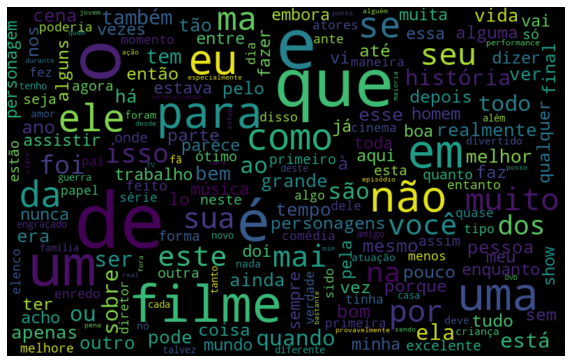

In [34]:
nuvem_palavras_neg(resenha, "text_pt")

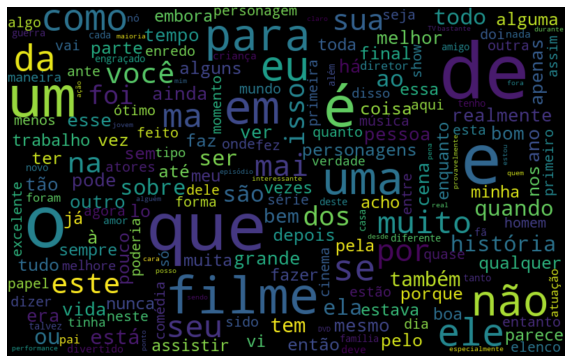

In [35]:
nuvem_palavras_pos(resenha, "text_pt")

In [38]:
#Biblioteca NLTK que melhora a visualização dos dados.
import nltk 

In [43]:
frase = ["Um filme ruim", "Um filme bom"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'Um filme ruim': 1, 'Um filme bom': 1})

In [40]:
from nltk import tokenize

In [42]:
frase = "Bem vindo ao mundo do PLN!"
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [44]:
#Criando um dicionário com todas as palavras do arquivo a ser analisado
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)


In [52]:
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                            "Frequencia": list(frequencia.values())})

In [55]:
df_frequencia.nlargest(columns = "Frequencia", n=10)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


In [57]:
import seaborn as sns

In [71]:
#Transformando tudo em uma função 
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                            "Frequencia": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequencia", n=quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequencia")
    ax.set(ylabel = "Contagem")
    plt.show()

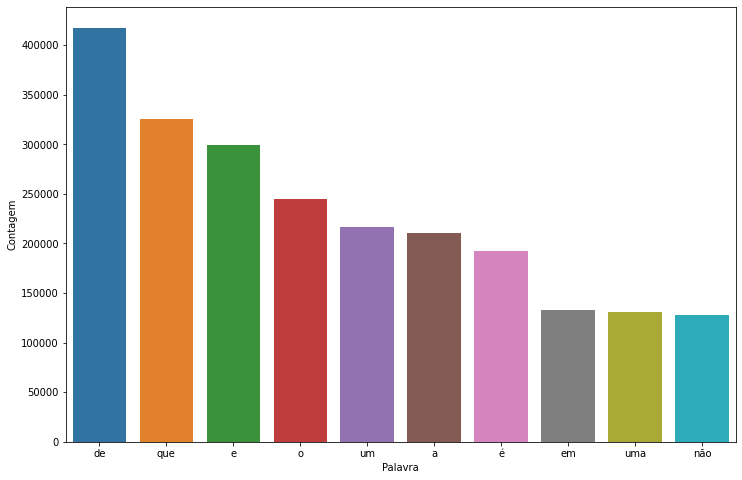

In [72]:
pareto(resenha, "text_pt", 10)

In [81]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brunaneves/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [83]:
palavras_irrelevantes

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [88]:
frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento"] = frase_processada

In [89]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [91]:
classificar_texto(resenha, "tratamento", "classificacao")

0.6607359482410028

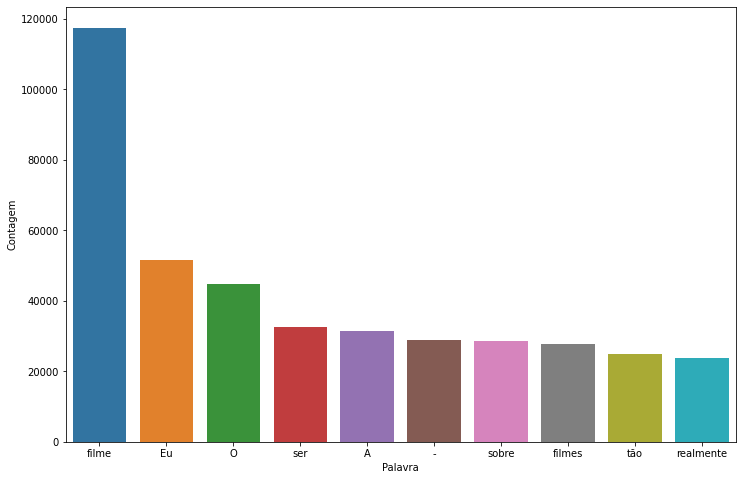

In [93]:
pareto(resenha, "tratamento", 10)